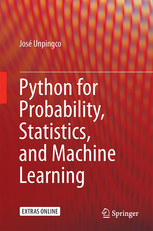

In [11]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

# Conditional Expectation as Projection

Now that we understand projection methods geometrically, we can apply
them to conditional probability. This is the *key* concept that ties
probability to geometry, optimization, and linear algebra. 

### Inner Product for Random Variables

 From our previous work on projection for vectors in
$\mathbb{R}^n$, we have a good geometric grasp on how projection is related to
Minimum Mean Squared Error (MMSE). By one abstract step, we can carry
all of our geometric interpretations to the space of random variables.
For example, we previously noted that at the point of projection, we had the
following orthogonal (i.e.,  perpendicular vectors) condition,

$$
( \mathbf{y} - \mathbf{v}_{opt} )^T \mathbf{v} = 0
$$

 which by noting the inner product slightly more abstractly as
$\langle\mathbf{x},\mathbf{y} \rangle = \mathbf{x}^T \mathbf{y}$, we can
express as

$$
\langle \mathbf{y} - \mathbf{v}_{opt},\mathbf{v} \rangle = 0
$$

 and by defining the inner product for the random variables
$X$ and $Y$ as

$$
\langle X,Y \rangle = \mathbb{E}(X Y)
$$

 we have the same relationship:

$$
\langle X-h_{opt}(Y),Y \rangle = 0
$$

 which holds not for vectors in $\mathbb{R}^n$, but for random
variables $X$ and $Y$ and functions of those random variables. Exactly why this
is true is technical, but it turns out that one can build up the *entire theory
of probability* this way [[edward1987radically]](#edward1987radically), by using the expectation as
an inner product.

Furthermore, by abstracting out the inner product concept, we have connected
minimum-mean-squared-error (MMSE) optimization problems, geometry, and random
variables.  That's  a lot of mileage to get a out of an abstraction and it
enables us to shift between these interpretations to address real problems.
Soon, we'll do this with some examples, but first we collect the most important
result that flows naturally from this abstraction.

### Conditional Expectation as Projection

The conditional expectation is the minimum mean squared error (MMSE) solution
to the following problem [^proof]:

$$
\min_h \int_{\mathbb{R}} (x - h(y) )^2 dx
$$

 with the minimizing $h_{opt}(Y) $ as

$$
h_{opt}(Y) = \mathbb{E}(X|Y)
$$

[^proof]: See appendix for proof using the Cauchy-Schwarz inequality.

 which is another way of saying that among all possible functions
$h(Y)$, the one that minimizes the MSE is $ \mathbb{E}(X|Y)$. From our previous discussion on projection, we noted that
these MMSE solutions can be thought of as projections onto a subspace that
characterizes $Y$. For example, we previously noted that at the point of
projection, we have perpendicular terms,

<!-- Equation labels as ordinary links -->
<div id="eq:ortho"></div>

$$
\begin{equation}
\langle X-h_{opt}(Y),Y \rangle = 0
\end{equation}
\label{eq:ortho} \tag{1}
$$

 but since we know that the MMSE solution

$$
h_{opt}(Y) = \mathbb{E}(X|Y)
$$

 we have by direct substitution,

<!-- Equation labels as ordinary links -->
<div id="eq:ortho_001"></div>

$$
\begin{equation}
\mathbb{E}(X-\mathbb{E}(X|Y),Y) = 0
\end{equation}
\label{eq:ortho_001} \tag{2}
$$

 That last step seems pretty innocuous, but it ties MMSE to
conditional expectation to the inner project abstraction, and in so doing,
reveals the conditional expectation to be a projection operator for random
variables. Before we develop this further, let's grab some quick dividends.
From the previous equation, by linearity of the expectation, we obtain,

$$
\mathbb{E}(X Y) =  \mathbb{E}(Y \mathbb{E}(X|Y))
$$

 which is the so-called *tower property* of the expectation. Note that
we could have found this by using the formal definition of conditional
expectation,

$$
\mathbb{E}(X|Y) = \int_{\mathbb{R}^2} x \frac{f_{X,Y}(x,y)}{f_Y(y)} dx dy
$$

 and brute-force direct integration,

$$
\mathbb{E}(Y \mathbb{E}(X|Y)) = \int_{\mathbb{R}} y \int_{\mathbb{R}} x \frac{f_{X,Y}(x,y)}{f_Y(y)}  f_Y(y) dx dy
$$

$$
\
                              =\int_{\mathbb{R}^2} x y f_{X,Y}(x,y) dx dy
$$

$$
\
                              =\mathbb{E}( X Y)
$$

 which is not very geometrically intuitive. This lack of geometric
intuition makes it hard to apply these concepts and keep track of these
relationships. 

We can keep pursuing this analogy and obtain the length of the error term 
from the orthogonality property of the MMSE solution as,

$$
\langle X-h_{opt}(Y),X-h_{opt}(Y)\rangle = \langle X,X  \rangle - \langle h_{opt}(Y),h_{opt}(Y)  \rangle
$$

 and then by substituting all the notation we obtain

$$
\mathbb{E}(X-  \mathbb{E}(X|Y))^2 = \mathbb{E}(X)^2 - \mathbb{E}(\mathbb{E}(X|Y) )^2
$$

 which would be tough to compute by direct integration.  

To formally establish that $\mathbb{E}(X|Y)$ *is* in fact *a projection operator* we
need to show idempotency.  Recall that idempotency means that once we project
something onto a subspace, further projections do nothing. In the space of
random variables, $\mathbb{E}(X|\cdot$) is the idempotent projection as we can
show by noting that

$$
h_{opt} = \mathbb{E}(X|Y)
$$

 is purely a function of $Y$, so that

$$
\mathbb{E}(h_{opt}(Y)|Y) = h_{opt}(Y)
$$

 because $Y$ is fixed, this verifies idempotency. Thus, conditional
expectation is the corresponding projection operator for random variables. We
can continue to carry over our geometric interpretations of projections for
vectors ($\mathbf{v}$) into random variables ($X$).  With this important
result, let's consider some examples of conditional expectations obtained by
using brute force to find the optimal MMSE function $h_{opt}$ as well as by
using our new perspective on conditional expectation.

**Example.** Suppose we have a random variable, $X$, then what constant is closest to $X$ in
the sense of the mean-squared-error (MSE)? In other words, which $c \in
\mathbb{R}$ minimizes the following mean squared error:

$$
\mbox{MSE} = \mathbb{E}( X - c )^2
$$

 we can work this out many ways. First, using calculus-based optimization,

$$
\mathbb{E}(X-c)^2=\mathbb{E}(c^2-2 c X + X^2)=c^2-2 c \mathbb{E}(X) + \mathbb{E}(X^2)
$$

 and then take the first derivative with respect to $c$ and solve:

$$
c_{opt}=\mathbb{E}(X)
$$

 Remember that $X$ may potentially take on many values, but this says
that the closest number to $X$ in the MSE sense is $\mathbb{E}(X)$.  This is
intuitively pleasing.  Coming at this same problem using our inner product,
from Equation ref{eq:ortho_001} we know that at the point of projection

$$
\mathbb{E}((X-c_{opt}) 1) = 0
$$

  where the $1$ represents the space of constants 
we are projecting onto. By linearity of the expectation, gives

$$
c_{opt}=\mathbb{E}(X)
$$

 Using the projection approach, because $\mathbb{E}(X|Y)$ is
the projection operator, with $Y=\Omega$ (the entire underlying
probability space), we have, using the definition of conditional
expectation:

$$
\mathbb{E}(X|Y=\Omega) = \mathbb{E}(X)
$$

 This is because of the subtle fact that a random variable over the entire
$\Omega$ space can only be a constant.  Thus, we just worked the same problem
three ways (optimization, orthogonal inner products, projection).

**Example.** Let's consider the following example with probability density
$f_{X,Y}= x + y $ where $(x,y) \in [0,1]^2$ and compute the conditional
expectation straight from the definition:

$$
\mathbb{ E}(X|Y) = \int_0^1 x \frac{f_{X,Y}(x,y)}{f_Y(y)} dx=  \int_0^1 x \frac{x+y}{y+1/2} dx =\frac{3 y + 2}{6 y + 3}
$$

 That was pretty easy because the density function was so simple. Now,
let's do it the hard way by going directly for the MMSE solution $h(Y)$. Then,

$$
\mbox{ MSE } = \underset{h}\min \int_0^1\int_0^1 (x - h(y) )^2 f_{X,Y}(x,y)dx dy
$$

$$
\
             = \underset{h}\min \int_0^1 y h^2 {\left (y \right )} - y h{\left (y \right )} + \frac{1}{3} y + \frac{1}{2} h^{2}{\left (y \right )} - \frac{2}{3} h{\left (y \right )} + \frac{1}{4} dy
$$

 Now we have to find a function $h$ that is going to minimize this.
Solving for a function, as opposed to solving for a number, is generally very,
very hard, but because we are integrating over a finite interval, we can use
the Euler-Lagrange method from variational calculus to take the derivative of
the integrand with respect to the function $h(y)$ and set it to zero. Using
Euler-Lagrange methods, we obtain the following result,

$$
2 y h{\left (y \right )} - y + h{\left (y \right )} - \frac{2}{3} =0
$$

 Solving this gives

$$
h_{opt}(y)= \frac{3 y + 2}{6 y + 3}
$$

  which is what we obtained before. Finally, we can solve this
using our inner product in Equation ref{eq:ortho} as

$$
\mathbb{E}((X-h(Y)) Y)=0
$$

  Writing this out gives,

$$
\int_0^1\int_0^1 (x-h(y))y(x+y) dx dy = \int_0^1\frac{1}{6}y(-3(2 y+1) h(y)+3 y+2) dy=0
$$

 and the integrand must be zero,

$$
2 y + 3 y^2 - 3 y h(y) - 6 y^2 h(y)=0
$$

 and solving this for $h(y)$ gives the same solution:

$$
h_{opt}(y)= \frac{3 y + 2}{6 y + 3}
$$

 Thus, doing it by the brute force integration from the definition,
optimization, or inner product gives us the same answer; but, in general, no
method is necessarily easiest because they both involve potentially difficult
or impossible integration, optimization, or functional equation solving.  The
point is that now that we have a deep toolbox, we can pick and choose which
tools we want to apply for different problems.

Before we leave this example, let's use Sympy to verify the length of the error
function we found earlier for this example:

$$
\mathbb{E}(X-\mathbb{E}(X|Y))^2=\mathbb{E}(X)^2-\mathbb{E}(\mathbb{E}(X|Y))^2
$$

 that is based on the Pythagorean theorem. First, we 
need to compute the marginal densities,

In [6]:
from sympy.abc import y,x
from sympy import integrate, simplify
fxy = x + y                 # joint density
fy = integrate(fxy,(x,0,1)) # marginal density
fx = integrate(fxy,(y,0,1)) # marginal density

 Then, we need to write out the conditional expectation,

In [7]:
EXY = (3*y+2)/(6*y+3) # conditional expectation

 Next, we can compute the left side, $\mathbb{E}(X-\mathbb{E}(X|Y))^2$,
as the following,

In [8]:
# from the definition
LHS=integrate((x-EXY)**2*fxy,(x,0,1),(y,0,1)) 
LHS # left-hand-side

-log(216)/144 + log(72)/144 + 1/12

 We can similarly compute the right side, $\mathbb{E}(X)^2-\mathbb{E}(\mathbb{E}(X|Y))^2$,
as the following,

In [9]:
# using Pythagorean theorem
RHS=integrate((x)**2*fx,(x,0,1))-integrate((EXY)**2*fy,(y,0,1))
RHS # right-hand-side

-log(216)/144 + log(72)/144 + 1/12

 Finally, we can verify that the left and right sides match,

In [10]:
print simplify(LHS-RHS)==0

True


In this section, we have pulled together all the projection and least-squares
optimization ideas from the previous sections to connect geometric notions of
projection from vectors in $\mathbb{R}^n$ to random variables. This resulted in
the remarkable realization that the conditional expectation is in fact a
projection operator for random variables.  Knowing this allows to approach
difficult problems in multiple ways, depending on which way is more intuitive
or tractable in a particular situation. Indeed, finding the right problem to
solve is the hardest part, so having many ways of looking at the same concepts
is crucial.

For much more detailed development, the book by Mikosch
[[mikosch1998elementary]](#mikosch1998elementary) has some excellent sections covering much of this
material with a similar geometric interpretation. Kobayashi
[[kobayashi2011probability]](#kobayashi2011probability) does too.  Nelson [[edward1987radically]](#edward1987radically) also
has a similar presentation based on hyper-real numbers.

## Appendix

We want to prove that we the conditional expectation is the
minimum mean squared error minimizer of the following:

$$
J= \min_h \int_{ \mathbb{R}^2 } \lvert X - h(Y) \rvert^2 f_{X,Y}(x,y) dx dy
$$

 We can expand this as follows,

$$
\begin{multline*}
J=\min_h \int_{ \mathbb{R}^2 } \lvert X \rvert^2 f_{X,Y}(x,y) dx dy + \int_{ \mathbb{R}^2 } \lvert h(Y) \rvert^2 f_{X,Y}(x,y) dx dy \\\
- \int_{ \mathbb{R}^2 } 2 X h(Y) f_{X,Y}(x,y) dx dy
\end{multline*}
$$

 To minimize this, we have to maximize the following:

$$
A=\max_h \int_{ \mathbb{R}^2 }  X h(Y) f_{X,Y}(x,y) dx dy
$$

 Breaking up the integral using the definition of conditional expectation

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
A =\max_h \int_\mathbb{R} \left(\int_\mathbb{R} X  f_{X|Y}(x|y) dx \right)h(Y) f_Y(y) dy 
\label{_auto1} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} \
=\max_h \int_\mathbb{R} \mathbb{E}(X|Y) h(Y)f_Y(Y) dy 
\label{_auto2} \tag{4}
\end{equation}
$$

 From properties of the Cauchy-Schwarz inequality, we know that the
maximum happens when $h_{opt}(Y) = \mathbb{E}(X|Y)$, so we have found the
optimal $h(Y)$ function as:

$$
h_{opt}(Y) = \mathbb{E}(X|Y)
$$

 which shows that the optimal function is the conditional expectation.